# Further Hypothesis Testing

In [1]:
# Select this cell and type Ctrl-Enter to execute the code below.

library(tidyverse)

set_plot_dimensions <- function(width_choice, height_choice) {
    options(repr.plot.width = width_choice, repr.plot.height = height_choice)
}

cbPal <- c("#E69F00", "#56B4E9", "#009E73", "#F0E442", "#CC79A7", "#0072B2", "#D55E00")

set_plot_dimensions(5, 4)


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [ ]:
# You should see "Attaching packages" and some ticks by the packages loaded.
# The "Conflicts" aren't a problem.

# Other problems loading the library? Try running this cell.

install.packages("tidyverse")

library(tidyverse)


## 2 - Comparing means of two groups

In [3]:
# Run this cell to load the data.

data <- read_csv("../assets/stars.csv")

type_key <- c("Brown Dwarf", "Red Dwarf", "White Dwarf", "Main Sequence", "Supergiant", "Hypergiant")
spectral_classes <- c("O", "B", "A", "F", "G", "K", "M")

data$type <- factor(data$type)
data$spectral_class <- factor(data$spectral_class, levels = spectral_classes)


Rows: 240 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): spectral_class
dbl (4): temperature, luminosity, radius, type

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


For now, let's look at only types 4 and 5 (supergiant and hypergiant). These are of particular interest to your supervisor, Dr Howe.

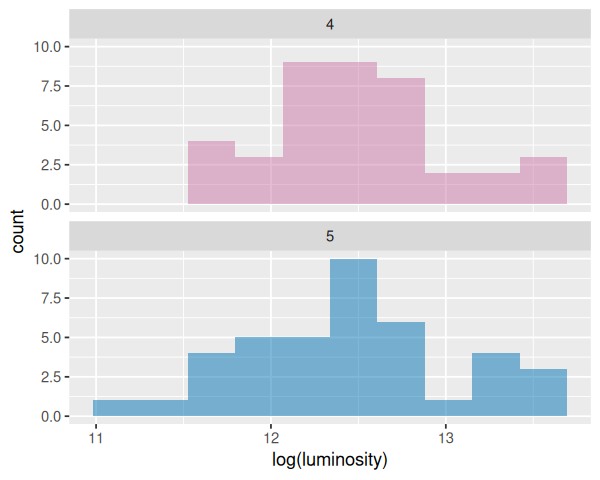

In [4]:
data %>%
    filter(type %in% c(4, 5)) %>%
    ggplot(aes(x = log(luminosity), fill = type)) +
    scale_fill_manual(values = cbPal[c(5, 6)]) +
    geom_histogram(alpha = 0.5, bins = 10) +
    guides(fill = "none") +
    facet_wrap(~type, ncol = 1)


Dr Howe has noticed that supergiants and hypergiants seem to have very similar luminosity distributions. She asks you to check whether they have the same mean.

### Question: do types 4 and 5 have the same mean luminosity?

The sample means of log(luminosity) are easy to obtain:

In [6]:
type4 <-
    data %>%
    filter(type == 4) %>%
    pull(luminosity) %>%
    log()

type5 <-
    data %>%
    filter(type == 5) %>%
    pull(luminosity) %>%
    log()

mean4 <- mean(type4)

mean5 <- mean(type5)

print(paste("Type 4:", mean4))
print(paste("Type 5:", mean5))
print(paste("difference:", mean4 - mean5))


[1] "Type 4: 12.4848011727945"
[1] "Type 5: 12.4650579376933"
[1] "difference: 0.019743235101231"


They are certainly very similar, but is the difference between them statistically significant?

<br>

From the histogram, both distributions of log(luminosity) seem approximately symmetrical and with a rough bell-curve, so for now we will assume that they are normally distributed. (We will look later at how to test for normality.)

We can therefore choose a **parametric test** for the difference between two means. This means that the test uses a defined probability distribution (e.g. the normal distribution) as a model for the process that generates the data.

<br>

In general, if the assumptions of a parametric test are satisfied then it will provide more **statistical power** than a non-parametric alternative. Statistical power is defined as the probability that the test *correctly rejects the null hypothesis when it is false*, also known as its *sensitivity* or *true positive rate*.

Different parametric test make different **assumptions** about the data, so it is important to think carefully about whether these are satisfied before deciding on a particular test.


In this example, a [*t-test*](https://en.wikipedia.org/wiki/Student%27s_t-test) is appropriate:

### t-test for 2 independent groups

#### Theory


When comparing two samples (1 and 2), we will refer to their sizes as $n_1$ and $n_2$, their sample means as $\bar{x}_1$ and $\bar{x}_2$ and their sample standard deviations as $s_1$ and $s_2$.

Recall that 

$$\bar{x} = \frac{\sum_{i=1}^n x_i}{n}$$

is the *sample mean*

and 

$$s^2 = \frac{\sum_{i=1}^n (x_i - \bar{x})^2}{n-1}$$

is the *unbiased sample variance*.

<br>

For our example, we need a two-tailed test:

$H_0$: The two samples come from the same distribution with mean $\mu = \mu_1 = \mu_2$.

$H_1$: The samples come from two different distributions, with means $\mu_1 \ne \mu_2$.

<br>

The test statistic is given by

$$t = \frac{\bar {x}_1 - \bar{x}_2}{s_p \cdot \sqrt{\frac{1}{n_1}+\frac{1}{n_2}}}$$

where 

$$s_p^2 = \frac{\left(n_1-1\right)s_1^2 + \left(n_2-1\right)s_2^2}{n_1 + n_2-2}$$ 

is an unbiased estimator of the *pooled variance* of the two samples.

<br>

Under $H_0$, the test statistic $t$ follows a *Student's t-distribution* with $n_1 + n_2 - 2$ degrees of freedom.

We use this distribution to calculate a p-value for the observed value of the test statistic, $t$.


#### Assumptions

- The means of the two samples follow normal distributions. This is true if the samples themselves are normal, but also true for any other distribution if $n$ is large (by the *central limit theorem*).
- The two populations have equal variance.
- The two samples are independent.

Two-sample t-tests are robust to moderate deviations from these assumptions, but major deviations may produce misleading results.

#### Application

$H_0$: $\mu_{\text{type4}} = \mu_{\text{type5}}$.

$H_1$: $\mu_{\text{type4}} \ne \mu_{\text{type5}}$.

Let's set a significance level $\alpha=0.05$

In R, we just supply the data for each sample and the `t.test` function deals with the rest:

In [7]:
t.test(type4, type5, var.equal = TRUE, paired = FALSE, alternative = "two.sided")



	Two Sample t-test

data:  type4 and type5
t = 0.16021, df = 78, p-value = 0.8731
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.2255986  0.2650851
sample estimates:
mean of x mean of y 
 12.48480  12.46506 


We can visualise this result on the t-distribution:

[1] "degrees of freedom: 78"


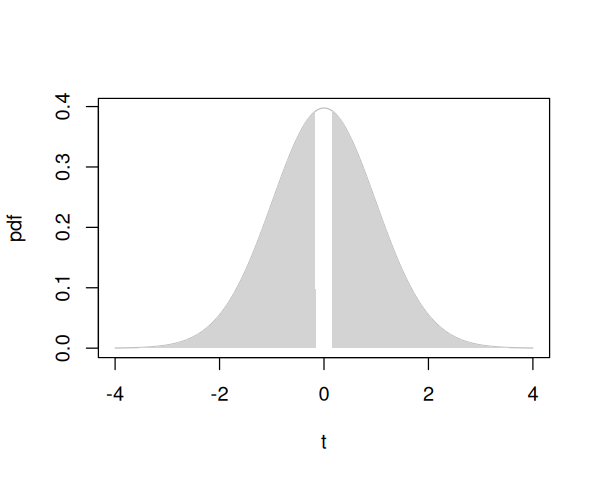

In [8]:
t_obs <- t.test(type4, type5, var.equal = TRUE, paired = FALSE, alternative = "two.sided")$statistic
df <- length(type4) + length(type5) - 2
print(paste("degrees of freedom:", df))

tmin <- -4
tmax <- 4
x <- seq(tmin, tmax, 0.01)
plot(x, dt(x, df), xlab = "t", ylab = "pdf", type = "l", col = "grey")

# the area of the shaded region is the two-tailed p-value
lower_tail <- seq(tmin, -t_obs, 0.01)
upper_tail <- seq(t_obs, tmax, 0.01)
polygon(c(lower_tail, -t_obs, tmin), c(dt(lower_tail, df), 0, 0), border = NA, col = "lightgrey")
polygon(c(upper_tail, tmax, t_obs), c(dt(upper_tail, df), 0, 0), border = NA, col = "lightgrey")


The t-test p-value is greater than than $\alpha$, so we accept the null hypothesis that the means are equal.

### Other types of t-test

#### One-tailed t-test

In the example above, we used a *two-tailed test* (because $H_1:\mu_1 \ne \mu_2$ was symmetrical). 

For a *one-tailed test*, we need to halve the two-sided p-value, e.g. 

$H_1:\mu_{\text{type4}}>\mu_{\text{type5}}$ would give us 

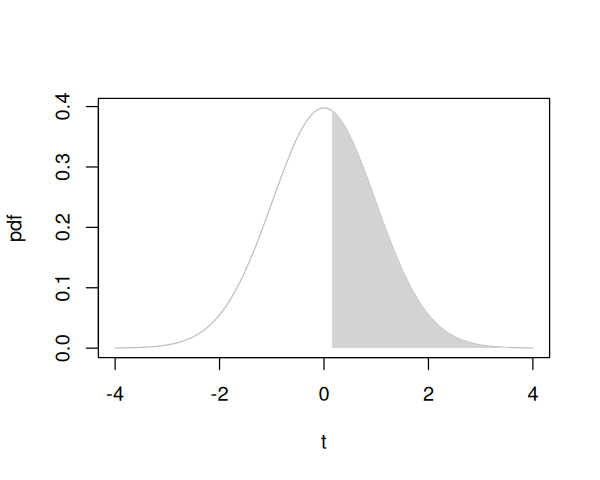

In [9]:
plot(x, dt(x, df), xlab = "t", ylab = "pdf", type = "l", col = "grey")

# the area of the shaded region is the one-tailed p-value for H1: mu_1 > mu_2
upper_tail <- seq(t_obs, tmax, 0.01)
polygon(c(upper_tail, tmax, t_obs), c(dt(upper_tail, df), 0, 0), border = NA, col = "lightgrey")


In R, we can get the upper tail p-value directly by specifying `alternative="greater"` :

In [10]:
p_upper_tail <- t.test(type4, type5, var.equal = TRUE, paired = FALSE, alternative = "greater")$p.value
print(paste("1-tailed p-value:", p_upper_tail))


[1] "1-tailed p-value: 0.436565642130232"


To test the complementary hypothesis (i.e. $H_1:\mu_1<\mu_2$), we would need to use `alternative="less"`, which is equivalent to calculating `1 - p_upper_tail`, e.g. 

$H_1:\mu_{\text{type4}}<\mu_{\text{type5}}$ would give us

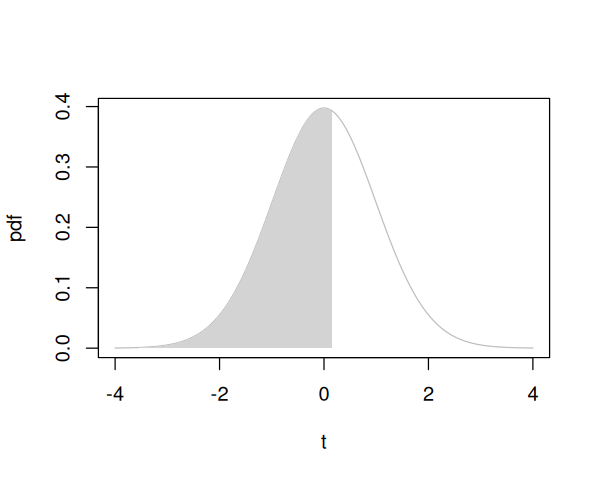

In [11]:
plot(x, dt(x, df), xlab = "t", ylab = "pdf", type = "l", col = "grey")

# the area of the shaded region is the one-tailed p-value for H1: mu_1 < mu_2
lower_tail <- seq(tmin, t_obs, 0.01)
polygon(c(lower_tail, t_obs, -tmin), c(dt(lower_tail, df), 0, 0), border = NA, col = "lightgrey")


In [12]:
p_complementary <- t.test(type4, type5, var.equal = TRUE, paired = FALSE, alternative = "less")$p.value
print(paste("complementary p-value:", p_complementary))


[1] "complementary p-value: 0.563434357869768"



#### Paired two-sample t-test

Sometimes we have two samples with paired observations (for example, luminosity of the same set of stars, as measured on two different dates). This situation requires testing whether the *mean of the differences* between pairs is zero, which is called a [*paired two-sample t-test*](https://en.wikipedia.org/wiki/Student%27s_t-test#Dependent_t-test_for_paired_samples).

#### Welch's t-test

If the sample sizes in the two groups being compared are equal, Student's original t-test is highly robust to the presence of unequal variances. [*Welch's t-test*](https://en.wikipedia.org/wiki/Welch%27s_t-test) is an alternative that is insensitive to equality of the variances, regardless of whether the sample sizes are similar.

#### One-sample t-test

For cases where we want to compare a sample against a theoretical mean, we can use the [*one-sample t-test*](https://en.wikipedia.org/wiki/Student%27s_t-test#One-sample_t-test).

### Alternatives to the t-test

#### Mann-Whitney U-test

For non-normal samples where $n$ is small, the assumptions of the t-test break down. However, we can use a *non-parametric test* to compare two samples, whatever the shape of their distributions.

The [*Mann-Whitney U-test*](https://en.wikipedia.org/wiki/Mann–Whitney_U_test) (aka Wilcoxon rank-sum test) is one such test. The null hypothesis for this test is that a randomly selected value from sample 1 is equally likely to be less than or greater than a randomly selected value from sample 2. If the distributions are sufficiently different, the resulting p-value will be small and we will reject this null hypothesis. Note that the U-test does not compare the sample means directly.


#### Wilcoxon signed-rank test

The [*Wilcoxon signed-rank test*](https://en.wikipedia.org/wiki/Wilcoxon_signed-rank_test) is is the paired-sample version of the Mann-Whitney U-test.

<br>


---